# Tutorial 10 - Clustering

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:

* Describe a case where clustering would be an appropriate tool, and what insight it would bring from the data.
* Explain the k-means clustering algorithm.
* Interpret the output of a k-means cluster analysis.
* Perform k-means clustering in R using `k-means`
* Visualize the output of k-means clustering in R using a coloured scatter plot 
* Identify when it is necessary to scale variables before clustering and do this using R
* Use the elbow method to choose the number of clusters for k-means
* Describe advantages, limitations and assumptions of the kmeans clustering algorithm.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(GGally)
library(broom)
options(repr.matrix.max.rows = 6)
source('tests.R')
source("cleanup.R")

‚îÄ‚îÄ Attaching packages ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse 1.3.1 ‚îÄ‚îÄ

‚úî ggplot2 3.3.6     ‚úî purrr   0.3.4
‚úî tibble  3.1.7     ‚úî dplyr   1.0.9
‚úî tidyr   1.2.0     ‚úî stringr 1.4.0
‚úî readr   2.1.2     ‚úî forcats 0.5.1

‚îÄ‚îÄ Conflicts ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ tidyverse_conflicts() ‚îÄ‚îÄ
‚úñ dplyr::filter() masks stats::filter()
‚úñ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‚Äòtestthat‚Äô


The following object is masked from ‚Äòpackage:dplyr‚Äô:

    matches


The following object is masked from ‚Äòpackage:purrr‚Äô:

    is_null


The following objects are masked from ‚Äòpackage:readr‚Äô:

    edition_get, local_edition


The following object is masked from ‚Äòpackage:tidyr‚Äô:

   

# 1. Pokemon

We will be working with the Pokemon dataset from Kaggle, which can be found [here.](https://www.kaggle.com/abcsds/pokemon)
This dataset compiles the statistics on 721 Pokemon. The information in this dataset includes Pokemon name, type, health points, attack strength, defensive strength, speed points etc. These are values that apply to a Pokemon's abilities (higher values are better). We are interested in seeing if there are any sub-groups/clusters of pokemon based on these statistics. And if so, how many sub-groups/clusters there are.

![](https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif)

Source: https://media.giphy.com/media/3oEduV4SOS9mmmIOkw/giphy.gif


**Question 1.0**
<br> {points: 1}

Use `read_csv` to load `pokemon.csv` from the `data/` folder.

*Assign your answer to an object called `pm_data`.*

In [2]:
pm_data <- read_csv("data/pokemon.csv")
pm_data

Rows: 800 Columns: 13
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr (3): Name, Type 1, Type 2
dbl (9): #, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation
lgl (1): Legendary

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#   Name                Type 1  Type 2 Total HP Attack Defense Sp. Atk
1   1   Bulbasaur           Grass   Poison 318   45 49     49       65    
2   2   Ivysaur             Grass   Poison 405   60 62     63       80    
3   3   Venusaur            Grass   Poison 525   80 82     83      100    
‚ãÆ   ‚ãÆ   ‚ãÆ                   ‚ãÆ       ‚ãÆ      ‚ãÆ     ‚ãÆ  ‚ãÆ      ‚ãÆ       ‚ãÆ      
798 720 HoopaHoopa Confined Psychic Ghost  600   80 110     60     150    
799 720 HoopaHoopa Unbound  Psychic Dark   680   80 160     60     170    
800 721 Volcanion           Fire    Water  600   80 110    120     130    
    Sp. Def Speed Generation Legendary
1    65     45    1          FALSE    
2    80     60    1          FALSE    
3   100     80    1          FALSE    
‚ãÆ   ‚ãÆ       ‚ãÆ     ‚ãÆ          ‚ãÆ        
798 130     70    6          TRUE     
799 130     80    6          TRUE     
800  90     70    6          TRUE

In [3]:
test_1.0()

Test passed üéâ
Test passed üòÄ
Test passed ü•á
Test passed ü•≥
[1] "Success!"


**Question 1.1**
<br> {points: 1}

Create a matrix of plots using `ggpairs`, choosing columns 5 to 11 (or equivalently, columns `Total` to `Speed`) from `pm_data`. First use the `select` function to extract columns `"Total":"Speed"`, and then pass the resulting dataframe to `ggpairs` to plot.

*Assign your answer to an object called `pm_pairs`.*

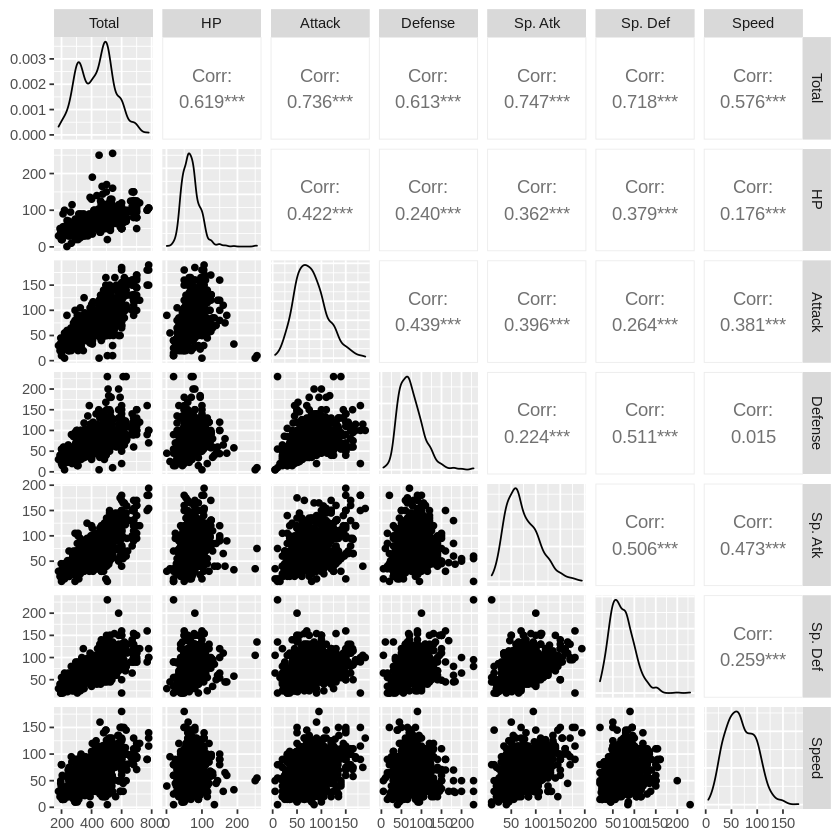

In [4]:
pm_pairs <- pm_data |>
    select("Total":"Speed") |>
    ggpairs()
pm_pairs

In [5]:
test_1.1()

Test passed üòÄ
Test passed ü•≥
Test passed üåà
Test passed üåà
[1] "Success!"


**Question 1.2** 
<br> {points: 1}

Select the columns `Speed` and `Defense`, creating a new dataframe with only those columns.

*Assign your answer to an object named `km_data`.*

In [6]:
km_data <- pm_data |>
    select("Speed", "Defense")
km_data

Speed Defense
1   45    49     
2   60    63     
3   80    83     
‚ãÆ   ‚ãÆ     ‚ãÆ      
798 70     60    
799 80     60    
800 70    120

In [7]:
test_1.2()

Test passed üéä
Test passed üéâ
[1] "Success!"


**Question 1.3**
<br> {points: 1}

Make a scatterplot to visualize the relationship between `Speed` and `Defense` of the Pokemon. Put the `Speed` variable on the x-axis, and the `Defense` variable on the y-axis.

*Assign your plot to an object called `pm_scatter`. Don't forget to do everything needed to make an effective visualization.*

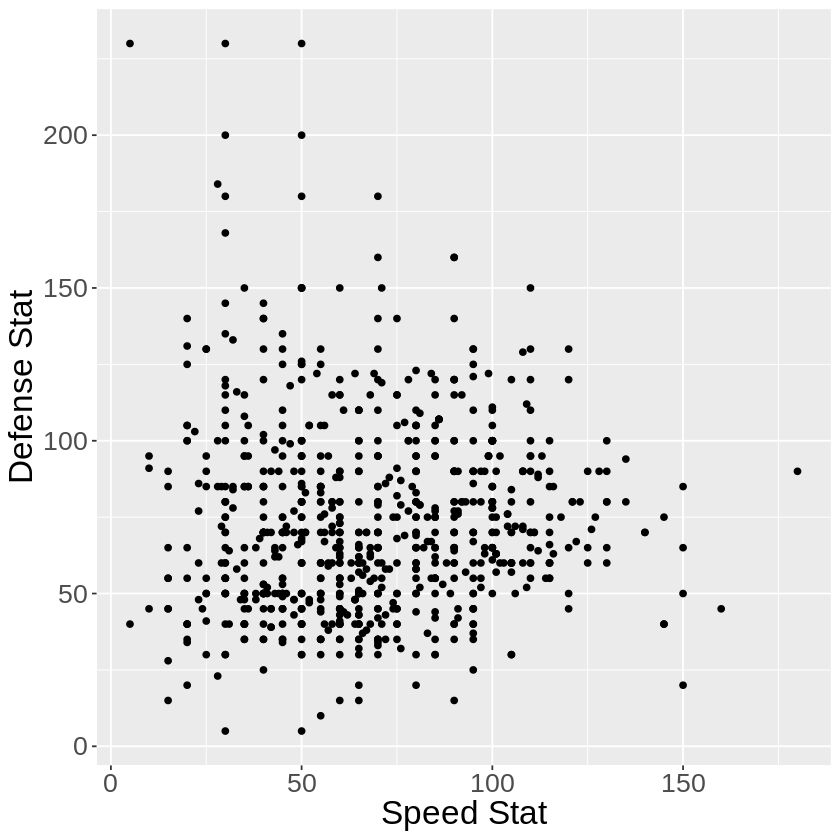

In [8]:
pm_scatter <- km_data |>
    ggplot(aes(x = Speed, y = Defense)) + 
        geom_point() +
        labs(x = "Speed Stat", y = "Defense Stat")+
        theme(text = element_text(size = 20))
pm_scatter

In [9]:
test_1.3()

Test passed ü•á
Test passed üò∏
Test passed üò∏
Test passed ü•≥
Test passed üéä
[1] "Success!"


**Question 1.4.1** 
<br> {points: 3}

We are going to cluster the Pokemon based on their `Speed` and `Defense`. Will it matter much for our clustering if we scale our variables? Is there any argument against scaling here?

It won't matter much if we scale our variables since the data is already pretty scaled. Both stats range between 5 and 200 and a change of 5 in either category carries the same weight.

**Question 1.4.2**
<br> {points: 1}

Now, let's use the `kmeans` function to cluster the Pokemon based on their `Speed` and `Defense` variables. For this question, use $k$ = 4. As good practice, let's standardize the data here first using `scale`. Name the standardized data `scaled_km_data`.

*Assign your answer to an object called `pokemon_clusters`.*

**Note:** We set the random seed here because `kmeans` initializes observations to random clusters.

In [10]:
#DON'T CHANGE THE SEED VALUE BELOW!
set.seed(2019)

scaled_km_data <- km_data |>
        mutate(across(everything(), scale))
pokemon_clusters <- scaled_km_data |>
        kmeans(centers = 4)
pokemon_clusters

K-means clustering with 4 clusters of sizes 259, 180, 99, 262

Cluster means:
       Speed     Defense
1 -0.5486990 -0.89261236
2 -0.7505326  0.31771609
3 -0.1256427  1.86306518
4  1.1055250 -0.03986927

Clustering vector:
  [1] 1 1 4 3 1 4 4 4 4 2 2 3 3 1 1 1 1 1 1 4 1 1 4 4 1 4 1 4 1 4 4 4 2 3 1 2 4
 [38] 1 1 4 1 2 1 4 1 1 1 4 1 2 2 1 2 1 4 4 4 4 4 1 4 1 4 1 4 4 4 2 1 4 4 4 1 2
 [75] 2 1 1 1 1 4 2 2 3 4 4 2 2 3 2 2 1 1 4 1 2 1 2 2 3 1 4 4 4 3 1 2 2 3 4 4 2
[112] 2 2 2 4 4 2 2 3 2 3 1 3 4 4 2 4 1 1 4 4 4 4 4 4 4 4 3 4 4 4 3 2 1 1 1 4 1
[149] 2 2 3 2 3 4 4 2 4 4 4 1 1 4 4 4 4 4 2 2 4 1 4 4 2 2 3 1 4 1 1 1 4 1 2 4 1
[186] 1 1 1 1 2 2 1 4 1 1 2 2 2 1 2 2 2 1 1 4 4 1 1 4 1 2 4 3 4 2 4 1 1 4 2 3 2
[223] 3 3 3 1 2 4 2 3 3 4 3 4 1 2 1 3 1 2 2 1 2 1 2 3 1 4 4 4 1 3 2 4 1 1 2 1 4
[260] 1 4 1 4 4 3 1 2 3 3 3 4 4 1 4 4 4 1 1 4 4 1 2 2 3 1 2 1 4 1 1 1 1 2 1 1 2
[297] 1 1 4 1 4 1 2 1 1 4 4 1 1 1 2 1 4 4 2 4 1 1 1 1 1 1 1 3 1 1 2 3 2 3 2 3 3
[334] 3 1 4 4 1 4 4 4 4 4 4 1 1 2 1 4 4 1 1 1 2 2 3 1 4 1

In [11]:
test_1.4.2()

Test passed ü•á
Test passed üòÄ
Test passed üéä
[1] "Success!"


**Question 1.5**
<br> {points: 1}

Let's visualize the clusters we built in `pokemon_clusters`. For this we can use the `broom` package.

> "The broom package takes the messy output of built-in functions in R, such as lm, nls, or t.test, and turns them into tidy data frames." - [Broom Package](https://cran.r-project.org/web/packages/broom/vignettes/broom.html)

Your tasks:

1. Use the `augment` function create a data frame with the cluster assignments for each data point from k-means (should have the columns `Speed` and `Defense` and `.cluster`). 
2. Create a scatter plot of `Speed` (x-axis) vs `Defense` (y-axis) with the points coloured by their cluster assignment. 

Name this plot `answer1.5`.

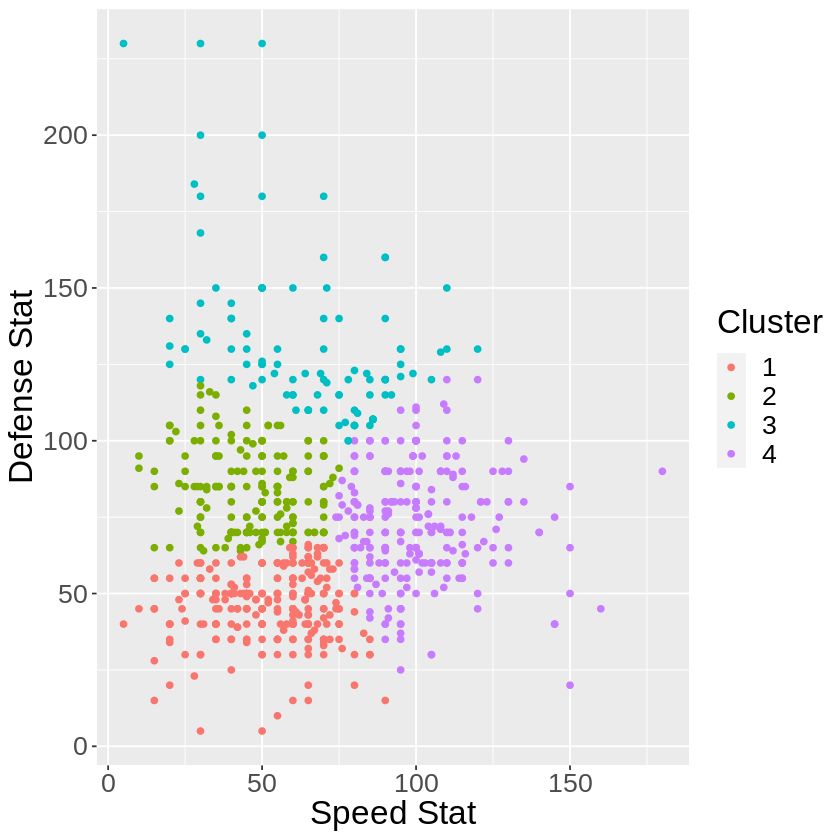

In [12]:
answer1.5 <- pokemon_clusters |>
    augment(km_data) |>
    ggplot(aes(x = Speed, y = Defense, colour = .cluster)) +
    geom_point()+
    labs(x = "Speed Stat", y = "Defense Stat", colour = "Cluster") +
    theme(text = element_text(size = 20))
answer1.5

In [13]:
test_1.5()

Test passed ü•á
Test passed üåà
Test passed üò∏
Test passed ü•≥
Test passed üòÄ
[1] "Success!"


**Question 1.6**
<br> {points: 3}

Below you can see multiple initializations of k-means with different seeds for `K = 4`. Can you explain what is happening and how we can mitigate this in the `kmeans` function?

![](imgs/multiple_initializations.png)

Each initialization is different because of the different seed used to create the initialization however, not every initialization is a good one. We can see that they clustered the data in very different ways which will have an effect on the final clustering. To mitigate this, we need to run the k-means function a few times, finding these different initializations, then choose the one with the lowest final total WSSD (within-cluster-sum-of-squared-distances).

**Question 1.7**
<br> {points: 1}

We know that choosing a $k$ is an important step of the process. We can do this by examining how the total within-cluster sum of squares changes as we change $k$ on a plot (which we call an elbow plot).

For this exercise, from $k$ = 1 to $k$ = 10, you will calculate the total within-cluster sum of squares:

1. following good practice, make sure you are using the standardized data (`scaled_km_data`)
2. create a tibble with the $k$ values
3. create a new column `poke_clusts` by applying `kmeans` to each value of `k` (set `nstart` to be 10)
4. create a new column `glanced` by applying `glance` to each of the results
5. remove the `poke_clusts` column
6. `unnest` the results of `glance`


*Assign your answer to a tibble object named `elbow_stats`. It should have the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.*

Remember, to acess the  total within-cluster sum of squares, you can use the `glance` function also from the `broom` package:

In [14]:
glance(pokemon_clusters)

totss tot.withinss betweenss iter
1 1598  528.2769     1069.723  3

In [15]:
set.seed(2020) # DO NOT REMOVE

pm_ks <- tibble(k = 1:10)
elbow_stats <- pm_ks |>
    rowwise() |>
    mutate(poke_clusts = list(kmeans(scaled_km_data, k, nstart = 10))) |>
    mutate(glanced = list(glance(poke_clusts))) |>
    select(-poke_clusts) |>
    unnest(glanced)
    
elbow_stats

k  totss tot.withinss betweenss    iter
1  1  1598  1598.0000    2.046363e-12 1   
2  2  1598  1031.4596    5.665404e+02 1   
3  3  1598   640.4274    9.575726e+02 3   
‚ãÆ  ‚ãÆ  ‚ãÆ     ‚ãÆ            ‚ãÆ            ‚ãÆ   
8   8 1598  269.9280     1328.072     4   
9   9 1598  235.8644     1362.136     4   
10 10 1598  214.3482     1383.652     6

In [16]:
test_1.7()

Test passed üòÄ
Test passed üéâ
Test passed ü•≥
[1] "Success!"


**Question 1.8**
<br> {points: 1}

Create the elbow plot. Put the within-cluster sum of squares on the y-axis, and the number of clusters on the x-axis.

*Assign your plot to an object called `elbow_plot`*.

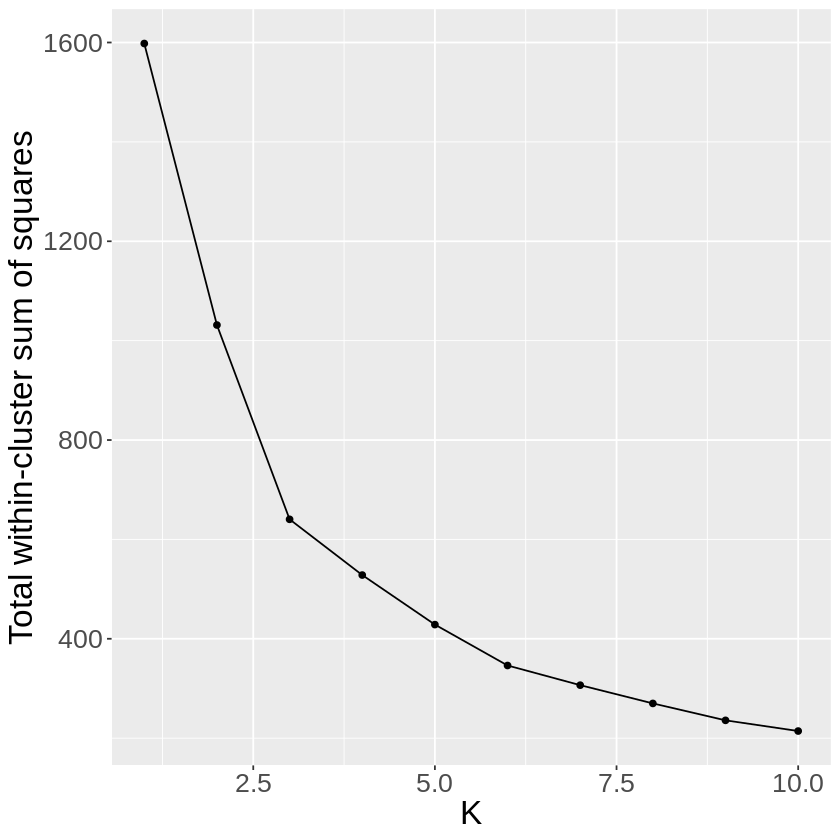

In [17]:
# your code here
elbow_plot <- elbow_stats |>
    ggplot(aes(x = k, y = tot.withinss))+
        geom_point()+
        geom_line() +
        xlab("K") +
        ylab("Total within-cluster sum of squares") +
        theme(text = element_text(size = 20))
elbow_plot

In [18]:
test_1.8()

Test passed üò∏
Test passed üåà
Test passed üéâ
Test passed ü•≥
Test passed üåà
[1] "Success!"


**Question 1.9** 
<br> {points: 3}

Based on the elbow plot above, what value of $k$ do you choose? Explain why.

Based on the above plot, I would choose k = 4 because after this point, the WSSD doesn't decrease by a significant amount (ie. the change in WSSD is diminishing). Before k = 4,the WSSD is large, so the algorithm must be combining groups.

**Question 1.10**
<br> {points: 3}

Using the value that you chose for k, perform the k-means algorithm, set `nstart = 10` and assign your answer to an object called `pokemon_final_kmeans`. 

Augment the data with the final cluster labels and assign your answer to an object called `pokemon_final_clusters`. 

Finally, create a plot called `pokemon_final_clusters_plot` to visualize the clusters. Include a title, colour the points by the cluster and make sure your axes are human-readable.

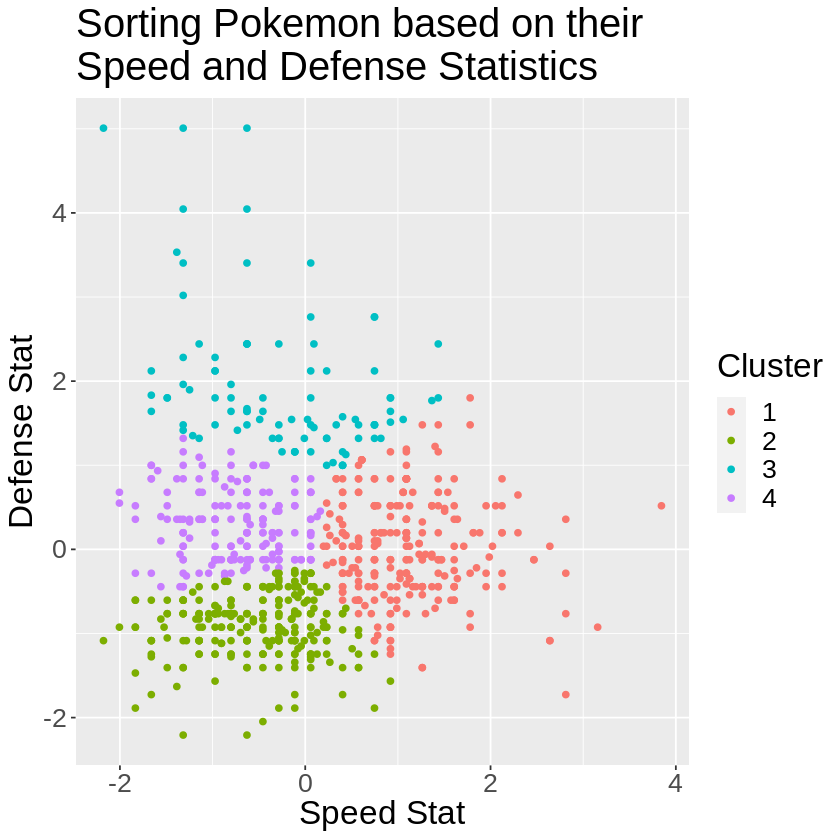

In [19]:
set.seed(2019) # DO NOT REMOVE
pokemon_final_kmeans <- scaled_km_data |> 
    kmeans(centers = 4, nstart = 10)
pokemon_final_clusters <- augment(pokemon_final_kmeans, scaled_km_data)
pokemon_final_clusters_plot <- pokemon_final_clusters |> 
    ggplot(aes(x = Speed, y = Defense, colour = .cluster)) +
        geom_point() +
        labs(x = "Speed Stat", 
       y = "Defense Stat", 
       color = "Cluster") + 
        theme(text = element_text(size = 20)) +
        ggtitle("Sorting Pokemon based on their \nSpeed and Defense Statistics")
pokemon_final_clusters_plot

**Question 1.11**
<br> {points: 3}

Using `Speed` and `Defense`, we find some number of clusters in our data. However, we have more information in our dataset that might be useful for clustering. Let's incorporate all of the numeric values to our k-means model. Again use `nstart = 10`.

Your tasks:

1. Select the numeric type columns only from the full data set `pm_data`. For example, do not include the `#` or `Generation`  columns etc. Assign your answer to an object called `pm_multi`.
2. Standardize the columns in `pm_multi` using `scale`.
2. From K = 1 to K = 10, calculate the total within-cluster sum of squares. Set `nstart` to be 10. Assign your answer to an object called `pm_multi_elbow_stats`. 
3. Use the elbow plot method to determine the number of clusters. Assign your answer to an object called `pm_multi_elbow_plot`.
4. Train a k-means model with the number of clusters determined in above. Assign your answer to an object called `multi_kmeans`. 
5. Print the cluster means for the trained model.

In [20]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)

pm_multi <- pm_data |> 
    select(Total:Speed) |> 
    mutate(across(everything(), scale))
k_list <- tibble(k = 1:10)
pm_multi_elbow_stats <- k_list |>
    rowwise() |>
    mutate(poke_clusts2 = list(kmeans(pm_multi, k, nstart = 10))) |>
    mutate(glanced = list(glance(poke_clusts2))) |>
    select(-poke_clusts2) |>
    unnest(glanced)
pm_multi_elbow_plot <- pm_multi_elbow_stats |>
    ggplot(aes(x = k, y = tot.withinss))+
        geom_point()+
        geom_line() +
        xlab("K") +
        ylab("Total within-cluster sum of squares") +
        theme(text = element_text(size = 20))
#pm_multi_elbow_plot
multi_kmeans <- pm_multi |> 
    kmeans(centers = 4, nstart = 10)
multi_kmeans

K-means clustering with 4 clusters of sizes 114, 286, 184, 216

Cluster means:
       Total         HP     Attack    Defense    Sp. Atk      Sp. Def
1  1.5651250  0.7889180  1.2753187  0.6244741  1.4469238  0.973086998
2 -1.0971420 -0.7543566 -0.7738347 -0.6809405 -0.7555124 -0.802620792
3  0.4649140  0.5494214  0.2211547  0.9550724  0.0714378  0.642891674
4  0.2306212  0.1144250  0.1631385 -0.2415481  0.1758457  0.001507225
       Speed
1  1.1121289
2 -0.6519279
3 -0.5315116
4  0.7290130

Clustering vector:
  [1] 2 4 3 1 2 4 4 1 1 2 4 3 1 2 2 4 2 2 4 4 2 2 4 1 2 4 2 4 2 4 2 4 2 3 2 2 3
 [38] 2 2 4 2 3 2 4 2 4 2 4 2 2 3 2 3 2 4 2 4 2 4 2 4 2 4 2 1 2 4 3 2 4 4 1 2 3
 [75] 3 2 4 4 2 4 2 3 3 4 4 2 3 3 2 4 2 2 4 2 3 2 3 2 3 2 4 4 1 2 2 3 2 3 2 4 2
[112] 3 2 3 4 4 3 2 3 2 3 3 3 4 1 2 4 2 4 2 4 4 4 4 4 4 4 1 4 2 3 1 3 2 2 3 4 1
[149] 2 2 3 2 4 4 1 3 1 1 1 2 4 1 1 1 1 1 2 4 3 2 4 4 2 4 3 2 4 2 4 2 4 2 2 4 2
[186] 4 2 2 2 2 3 2 4 2 2 3 1 3 2 3 3 3 2 2 4 2 2 3 4 2 3 4 3 4 3 4 2 3 4 2 3 3
[223] 

**Question 1.12** 
<br> {points: 3}

Visualizing these clusters is not a simple task given the high-dimensionality of the model. But do the cluster means output help? Justify your reasoning.

The cluster means output helps a little bit. From the output, we know that there are 4 clusters, ranging from Pokemon that have overall high statistics to Pokemon with relatively low statistics.

# 2. Tourism Reviews

![](https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif)
Source: https://media.giphy.com/media/xUNd9IsOQ4BSZPfnLG/giphy.gif

The Ministry of Land, Infrastructure, Transport and Tourism of Japan is interested in knowing the type of tourists that visit East Asia. They know the [majority of their visitors come from this region](https://statistics.jnto.go.jp/en/graph/) and would like to stay competitive in the region to keep growing the tourism industry. For this, they have hired us to perform segmentation of the tourists. A [dataset from TripAdvisor](https://archive.ics.uci.edu/ml/datasets/Travel+Reviews) has been scraped and it's provided to you.

This dataset contains the following variables:

- User ID : Unique user id 
- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

**Question 2.0**
<br> {points: 3}

Load the data set from https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv and clean it so that only the Category # columns are in the data frame (i.e., remove the `User ID` column). 

Assign your answer to an object called `clean_reviews`.

In [21]:
clean_reviews <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv") |> 
    select(-"User ID")
clean_reviews

Rows: 980 Columns: 11
‚îÄ‚îÄ Column specification ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
Delimiter: ","
chr  (1): User ID
dbl (10): Category 1, Category 2, Category 3, Category 4, Category 5, Catego...

‚Ñπ Use `spec()` to retrieve the full column specification for this data.
‚Ñπ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Category 1 Category 2 Category 3 Category 4 Category 5 Category 6
1   0.93       1.8        2.29       0.62       0.80       2.42      
2   1.02       2.2        2.66       0.64       1.42       3.18      
3   1.22       0.8        0.54       0.53       0.24       1.54      
‚ãÆ   ‚ãÆ          ‚ãÆ          ‚ãÆ          ‚ãÆ          ‚ãÆ          ‚ãÆ         
978 0.61       1.32       0.67       0.43       1.30       1.78      
979 0.93       0.20       0.13       0.43       0.30       0.40      
980 0.93       0.56       1.13       0.51       1.34       2.36      
    Category 7 Category 8 Category 9 Category 10
1   3.19       2.79       1.82       2.42       
2   3.21       2.63       1.86       2.32       
3   3.18       2.80       1.31       2.50       
‚ãÆ   ‚ãÆ          ‚ãÆ          ‚ãÆ          ‚ãÆ          
978 3.17       2.81       1.34       3.02       
979 3.18       2.98       1.12       2.46       
980 3.18       2.87       1.34       2.40

In [22]:
test_that('Did not create an object called clean_reviews', {
    expect_true(exists("clean_reviews"))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


Test passed ü•á


**Question 2.1**
<br> {points: 3}

Perform k-means and vary $k$ from 1 to 10 to identify the optimal number of clusters. Use `nstart = 100`. Assign your answer to a tibble object called `elbow_stats` that has the columns `k`, `totss`, `tot.withinss`, `betweenss`, and `iter`.  

Afterwards, create an elbow plot to help you choose $k$. Assign your answer to an object called `tourism_elbow_plot`.

Warning message:
‚Äúdid not converge in 10 iterations‚Äù
Warning message:
‚Äúdid not converge in 10 iterations‚Äù


k  totss tot.withinss betweenss     iter
1  1  9790  9790.000     -5.820766e-11 1   
2  2  9790  7759.473      2.030527e+03 1   
3  3  9790  7090.652      2.699348e+03 3   
‚ãÆ  ‚ãÆ  ‚ãÆ     ‚ãÆ            ‚ãÆ             ‚ãÆ   
8   8 9790  5055.061     4734.939      6   
9   9 9790  4841.624     4948.376      9   
10 10 9790  4678.350     5111.650      6

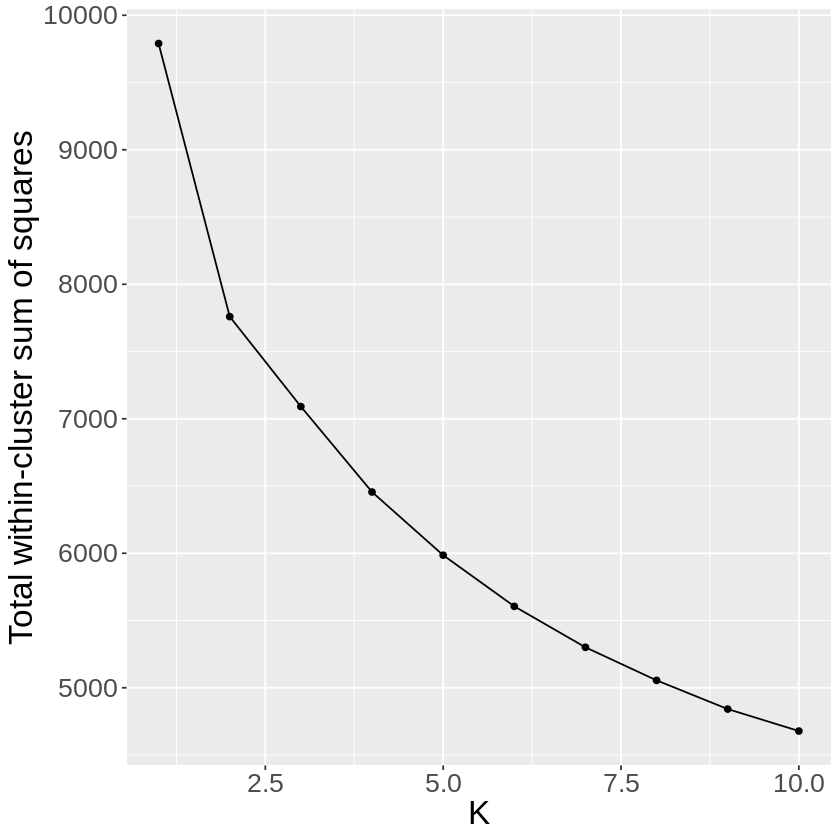

In [23]:
#DON'T CHANGE THIS SEED VALUE
set.seed(2019)

tourism_scaled <- clean_reviews |> 
    mutate(across(everything(), scale))
k_reviews <- tibble(k = 1:10)
elbow_stats <- k_reviews |>
    rowwise() |>
    mutate(tourism_clusts = list(kmeans(tourism_scaled, k, nstart = 100))) |>
    mutate(glanced = list(glance(tourism_clusts))) |>
    select(-tourism_clusts) |>
    unnest(glanced)
elbow_stats
tourism_elbow_plot <- elbow_stats |>
    ggplot(aes(x = k, y = tot.withinss))+
        geom_point()+
        geom_line() +
        xlab("K") +
        ylab("Total within-cluster sum of squares") +
        theme(text = element_text(size = 20))
tourism_elbow_plot

In [24]:
test_that('Did not create an object called elbow_stats', {
    expect_true(exists('elbow_stats'))
})
test_that('Did not create a plot called tourism_elbow_plot', {
    expect_true(exists('tourism_elbow_plot'))
})
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.

Test passed üòÄ
Test passed üéâ


**Question 2.2** 
<br> {points: 3}

From the elbow plot above, which $k$ should you choose? Explain why you chose that $k$.

Looking at the above plot, I would choose k = 5. There isn't really an "elbow" in the plot, but after k = 5, the change in WSSD starts diminishing between k values. Before k = 5, there is relatively large change, so k = 5 seems to be the sweet spot.

**Question 2.3**
<br> {points: 3}

Run kmeans again, with the optimal $k$, and assign your answer to an object called `reviews_clusters`. Use `nstart = 100`. Then, use the `augment` function to get the cluster assignments for each point. Name the data frame `cluster_assignments`.

In [25]:
#DONT CHANGE THIS SEED VALUE
set.seed(2019)

review_clusters <- tourism_scaled |> 
    kmeans(centers = 5, nstart = 100)
review_clusters
cluster_assignments <- augment(review_clusters, tourism_scaled)
cluster_assignments

K-means clustering with 5 clusters of sizes 21, 242, 292, 334, 91

Cluster means:
   Category 1  Category 2 Category 3   Category 4 Category 5 Category 6
1  0.39371694  1.18630839 -0.5760266  5.554224035  0.2988856  0.1923288
2 -0.29291000 -0.17013580 -0.5106823 -0.008050818  0.1130212  0.2420091
3 -0.09944243  0.29097711  1.1361487  0.103572963  0.6905017  0.7485716
4 -0.28507308  0.07429007 -0.5241725 -0.400673169 -0.5349112 -0.7281008
5  2.05349189 -1.02766829 -0.2307708 -0.122075535 -0.6219107 -0.4176083
   Category 7 Category 8  Category 9 Category 10
1  0.06259814 -0.8090710 -0.16562336 -0.88364722
2 -0.12526095  0.7171820  0.76230243 -0.04310348
3  0.99612153 -0.3351766 -0.07604006 -0.85753469
4 -0.72456413 -0.2340777 -0.38988437  0.78804118
5 -0.21829096  0.2141316 -0.31400020  0.17782428

Clustering vector:
  [1] 3 3 5 4 3 4 4 4 3 2 2 4 3 3 3 3 4 3 2 3 4 4 4 4 2 3 3 3 4 3 3 3 3 2 2 2 4
 [38] 4 3 5 4 4 4 2 2 5 2 4 4 3 4 4 3 5 4 4 3 4 3 3 3 5 4 4 5 5 4 4 4 4 5 3 2 4
 [75] 3 3 5 

Category 1 Category 2  Category 3 Category 4   Category 5 Category 6
1   0.1125872   0.9354094   1.6189231  0.312800143 -0.3194447  1.0696225
2   0.3878904   1.7717393   2.0881049  0.384297318  1.0979250  2.4782350
3   0.9996754  -1.1554154  -0.6001801 -0.008937147 -1.5996497 -0.5614024
‚ãÆ   ‚ãÆ          ‚ãÆ           ‚ãÆ          ‚ãÆ            ‚ãÆ          ‚ãÆ         
978 -0.8662688 -0.06818649 -0.4353324 -0.36642302   0.8235954 -0.1165774
979  0.1125872 -2.40991027 -1.1200842 -0.36642302  -1.4624848 -2.6743211
980  0.1125872 -1.65721334  0.1479747 -0.08043432   0.9150386  0.9584163
    Category 7 Category 8 Category 9 Category 10 .cluster
1    1.1580656 -0.3277049  0.6871667 -1.1799885  3       
2    3.7141565 -1.4912948  0.7968671 -1.4911467  3       
3   -0.1199798 -0.2549805 -0.7115135 -0.9310618  5       
‚ãÆ   ‚ãÆ          ‚ãÆ          ‚ãÆ          ‚ãÆ           ‚ãÆ       
978 -1.3980252 -0.1822562 -0.6292382  0.6869613  4       
979 -0.1199798  1.0540581 -1.2325904 -1.0555251  5       
980 -0.1199798  0.2540900 -0.6292382 -1.2422201  3

For the following 2 questions use the following plot as reference. 

> The visualization below is a density plot, you can think of it as a smoothed version of a histogram. Density plots are more effective for comparing multiple distributions. What we are looking for with these visualizations, is to see which variables have difference distributions between the different clusters.

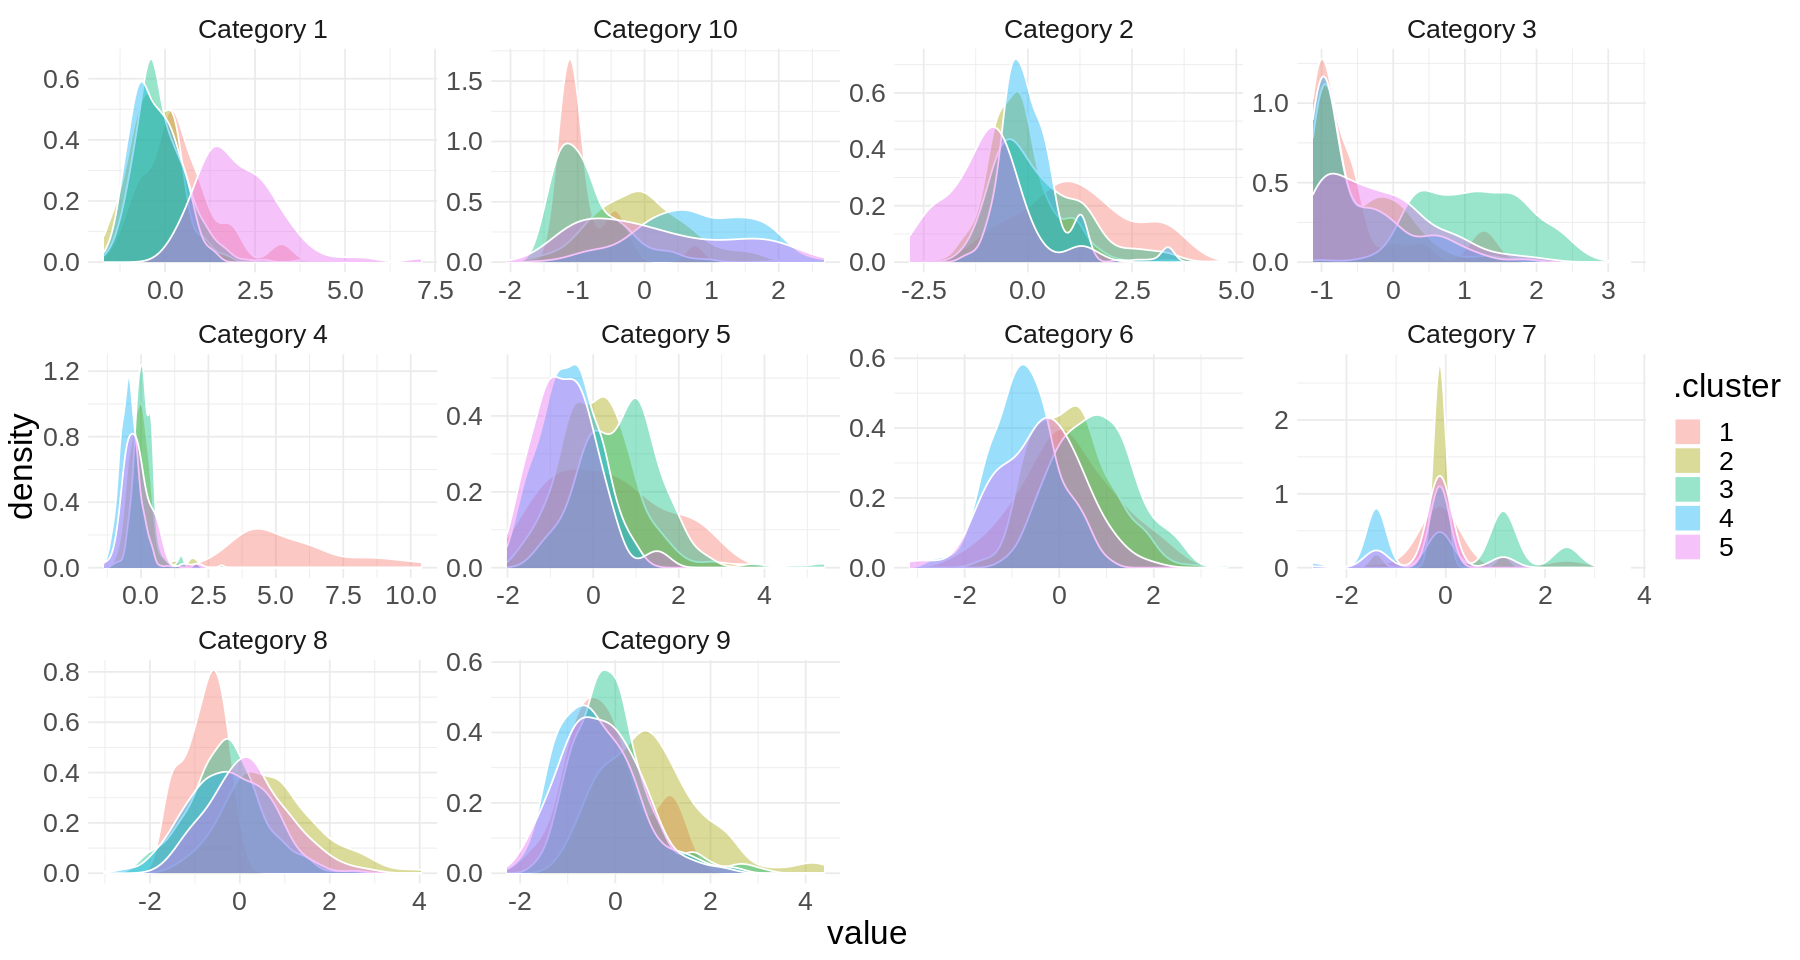

In [26]:
options(repr.plot.height = 8, repr.plot.width = 15)
cluster_assignments |>
    pivot_longer(cols = -.cluster, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = .cluster)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ category, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

**Question 2.4** Multiple Choice:
<br> {points: 1}

From the plots above, point out the categories that we might hypothesize are driving the clustering? (i.e., are useful to distinguish between the type of tourists?) We list the table of the categories below. 

- Category 1 : Average user feedback on art galleries 
- Category 2 : Average user feedback on dance clubs 
- Category 3 : Average user feedback on juice bars 
- Category 4 : Average user feedback on restaurants 
- Category 5 : Average user feedback on museums 
- Category 6 : Average user feedback on resorts 
- Category 7 : Average user feedback on parks/picnic spots 
- Category 8 : Average user feedback on beaches 
- Category 9 : Average user feedback on theaters 
- Category 10 : Average user feedback on religious institutions

A. 10, 3, 5, 6, 7

B. 10, 3, 5, 6, 1

C. 10, 3, 4, 6, 7

D. 10, 2, 5, 6, 7

*Assign your answer to an object called `answer2.4`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [27]:
# your code here
answer2.4 <- "D"
answer2.4

[1] "D"

In [28]:
test_that('Did not create an object called answer2.4', {
    expect_true(exists('answer2.4'))
    })
# The remainder of the tests were intentionally hidden so that you can practice deciding 
# when you have the correct answer.


Test passed üéâ


**Question 2.5** 
<br> {points: 3}

Discuss one disadvantage of not being able to visualize the clusters when dealing with multidimensional data.

One disadvantage of not being able to visualize the clusters is not being able to visually check if the clustering has been done well. When there are only 2 or 3 dimensions, we can easily see if there are distinct clusters within the data and if the model did a good job. Even though we can see the cluster means output when working with multidimensional data, our brains don't do well with numbers, so it can still be hard to determine if the clustering has been done well.

In [29]:
source("cleanup.R")